In [1]:
!pip install -q yfinance
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.2 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(5)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-15,140.050003,141.279999,137.229996,137.669998,137.669998,42781500,AMAZON
2023-08-16,137.190002,137.270004,135.009995,135.070007,135.070007,41675900,AMAZON
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.184998,132.710007,133.949997,133.949997,20629606,AMAZON


In [30]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days,MA for 40 days,MA for 50 days,Daily Return
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,242.000000,232.000000,222.000000,212.000000,202.000000,250.000000
mean,159.424065,161.175100,157.800578,159.525020,159.008786,7.006474e+07,158.588541,158.095553,157.474198,156.900050,156.361702,0.000361
std,18.319102,18.061709,18.583109,18.286839,18.439302,2.389797e+07,18.310850,18.070582,17.547376,16.886137,16.151607,0.018178
min,126.010002,127.769997,124.169998,125.019997,124.488869,2.075962e+07,127.711128,130.387707,133.492794,135.927573,138.171100,-0.058679
25%,145.815002,147.340004,144.014999,145.919998,145.274223,5.189610e+07,144.683812,144.865308,144.488334,144.430069,143.303287,-0.009585
50%,154.789993,157.089996,153.369995,155.000000,154.394073,6.557380e+07,152.839207,150.980577,151.071820,150.448985,150.024546,0.000391
75%,173.145004,174.445000,172.035004,173.660004,173.186264,8.135480e+07,172.960252,171.918462,170.886156,170.089758,169.509225,0.009806
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08,193.953090,192.371725,191.321975,189.291385,187.194618,0.088975


In [31]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-22 to 2023-08-21
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            251 non-null    float64
 1   High            251 non-null    float64
 2   Low             251 non-null    float64
 3   Close           251 non-null    float64
 4   Adj Close       251 non-null    float64
 5   Volume          251 non-null    int64  
 6   company_name    251 non-null    object 
 7   MA for 10 days  242 non-null    float64
 8   MA for 20 days  232 non-null    float64
 9   MA for 30 days  222 non-null    float64
 10  MA for 40 days  212 non-null    float64
 11  MA for 50 days  202 non-null    float64
 12  Daily Return    250 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 27.5+ KB


In [7]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,106.177633,107.661365,105.001482,106.319622,106.319622,2.705244e+07
std,13.024782,13.090327,13.047614,13.048731,13.048731,1.111356e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.069030e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.422500e+07
75%,118.514999,120.935001,117.255001,119.309998,119.309998,3.020725e+07
max,133.009995,134.070007,132.130005,133.110001,133.110001,9.779860e+07


In [8]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-22 to 2023-08-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [11]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,276.478327,279.628546,273.520876,276.607888,275.160829,2.920259e+07
std,39.181317,39.249671,39.066109,39.144367,39.634332,1.092711e+07
min,217.550003,220.410004,213.429993,214.250000,212.199982,9.200800e+06
25%,243.160004,245.305000,240.264999,242.514999,240.532341,2.247735e+07
50%,261.690002,266.480011,260.290009,263.100006,261.316925,2.669820e+07
75%,314.630005,318.565002,313.164993,315.870010,315.536972,3.235000e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,8.610200e+07


In [12]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-22 to 2023-08-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [15]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,109.962510,111.568865,108.295578,109.924940,109.924940,6.643494e+07
std,16.158317,16.225997,16.154047,16.134798,16.134798,2.647231e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.062961e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.023940e+07
50%,105.260002,106.790001,104.330002,105.660004,105.660004,5.926720e+07
75%,125.820000,127.545002,124.410000,126.349998,126.349998,7.277790e+07
max,141.059998,143.630005,139.320007,142.220001,142.220001,2.231334e+08


In [16]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-22 to 2023-08-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


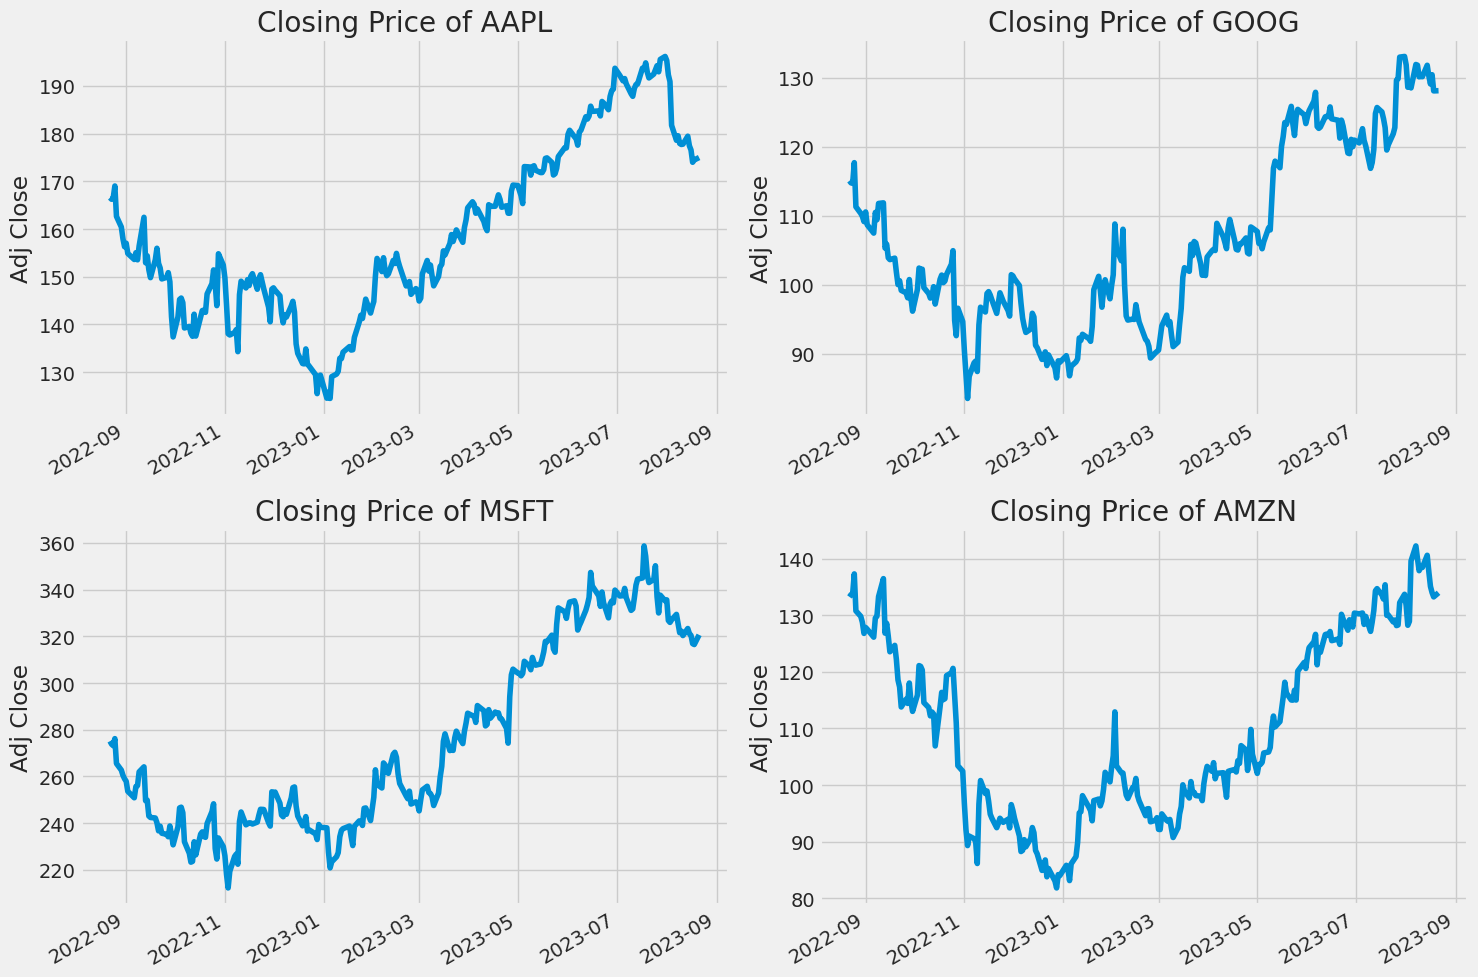

In [19]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

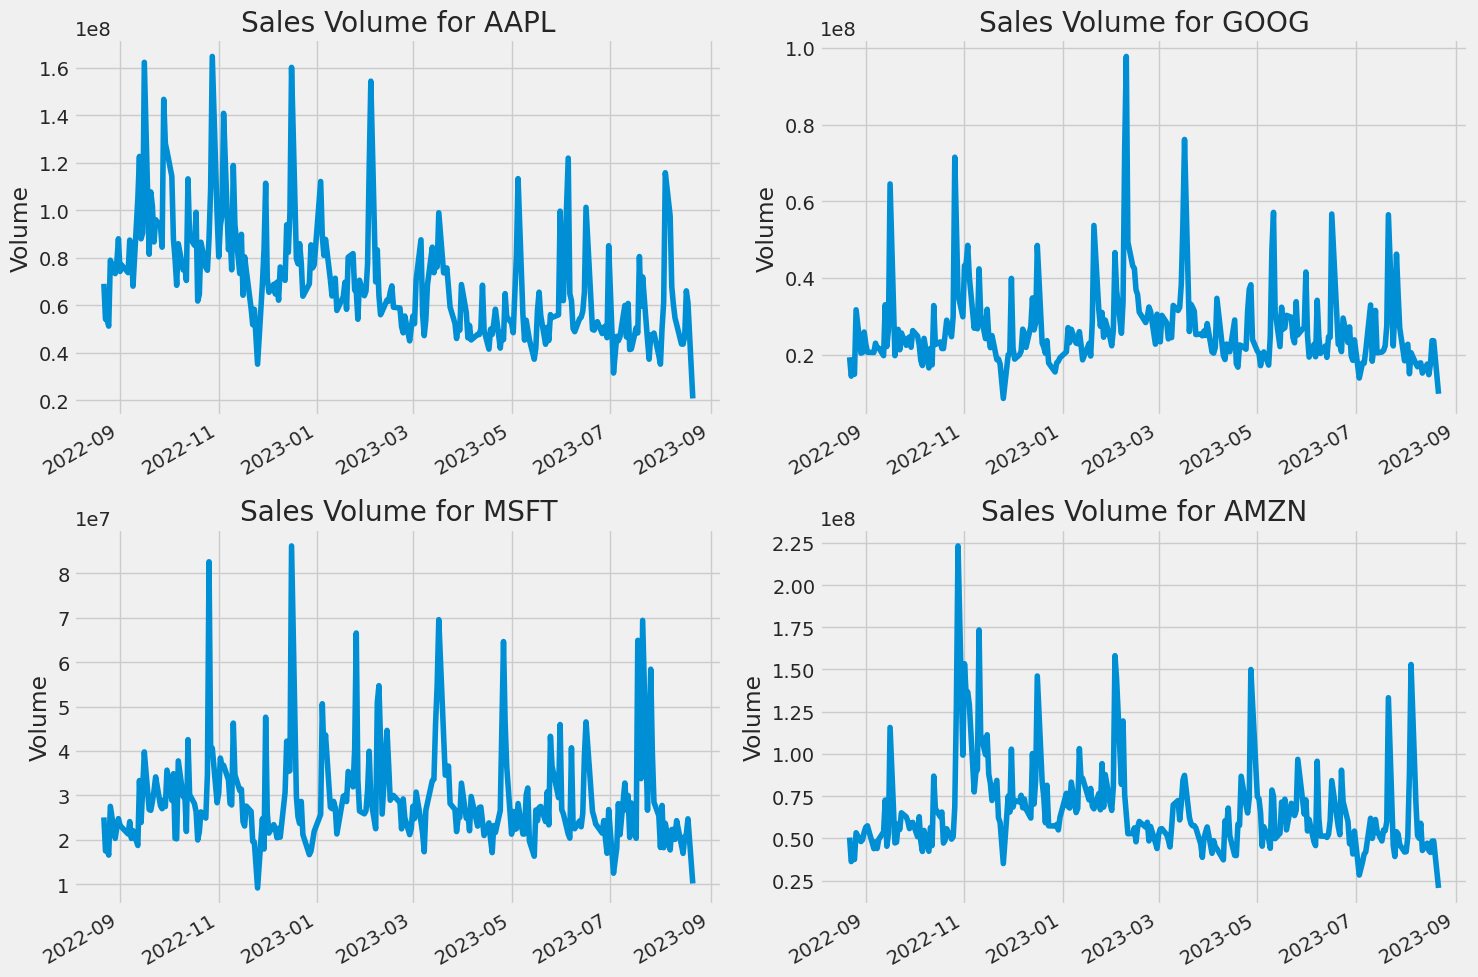

In [20]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

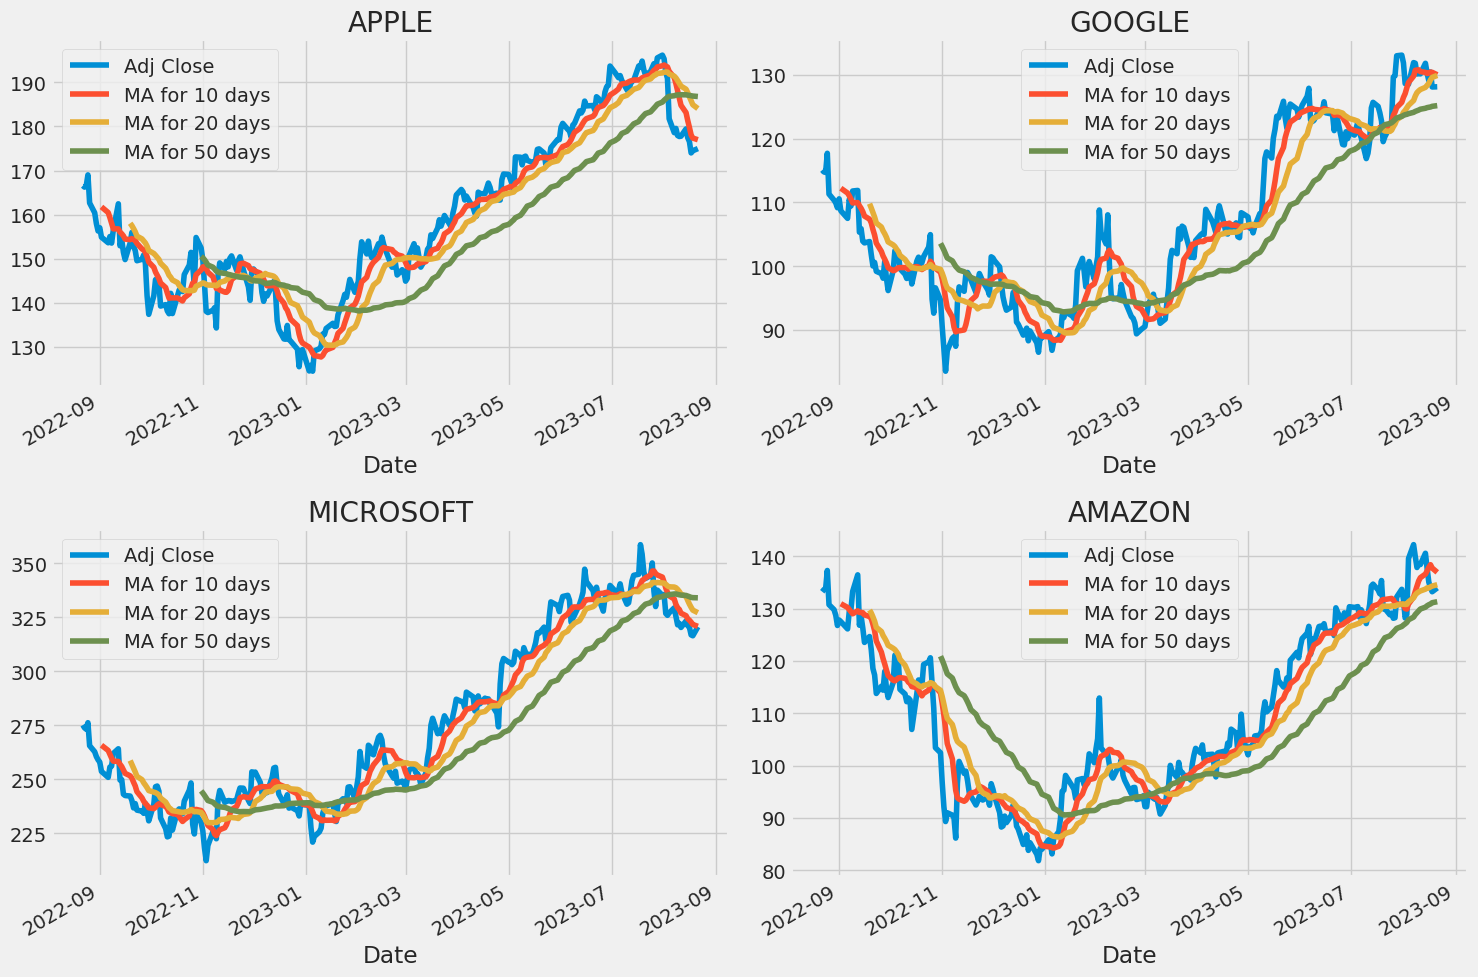

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

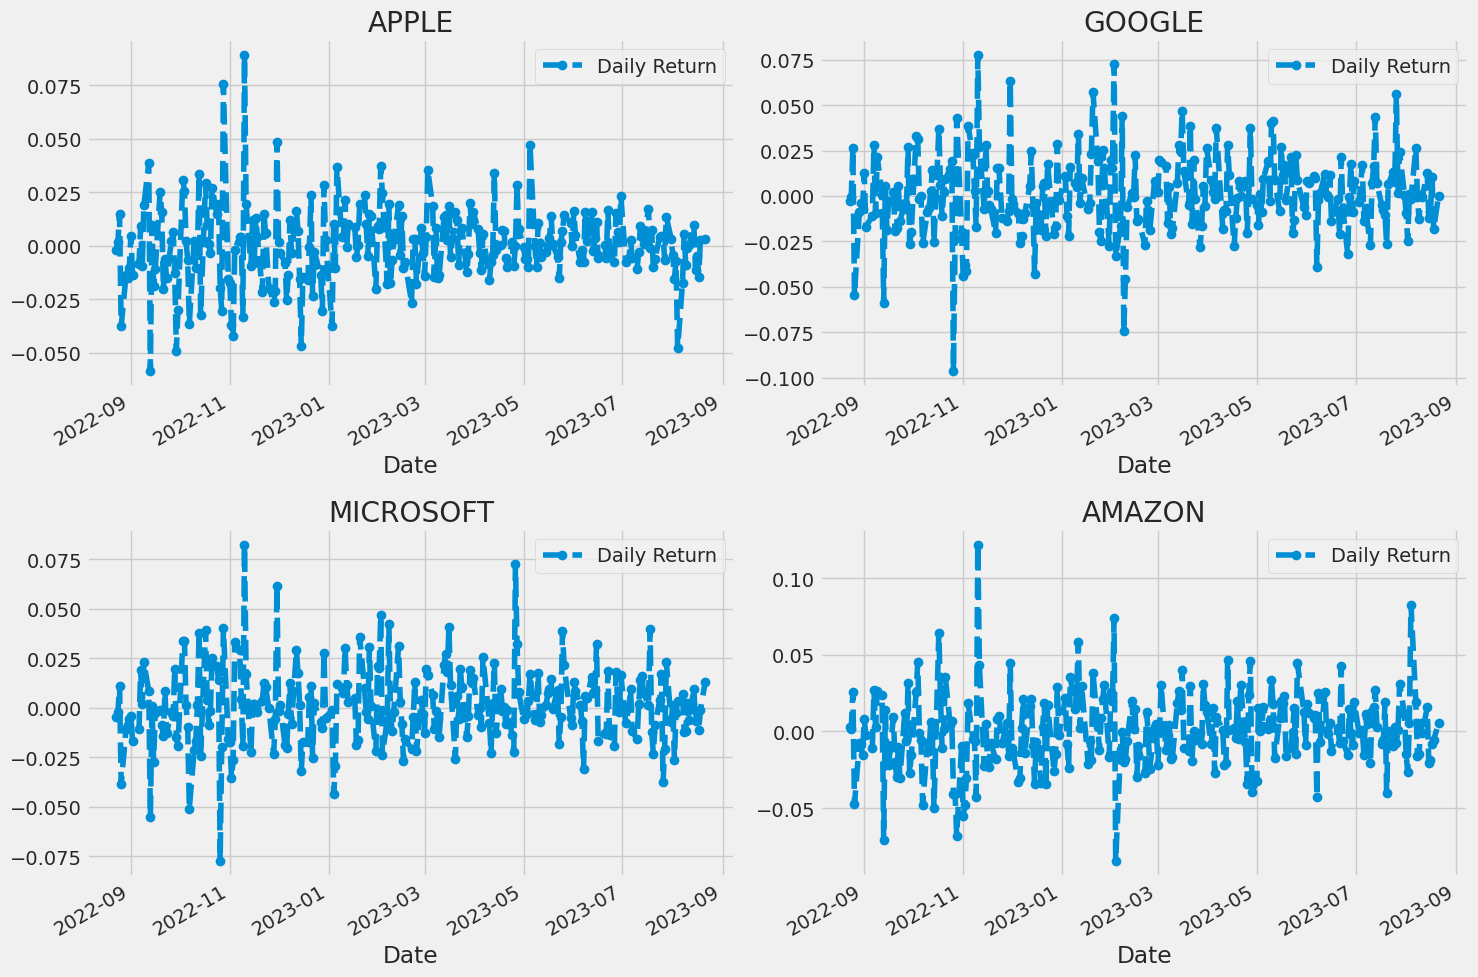

In [23]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

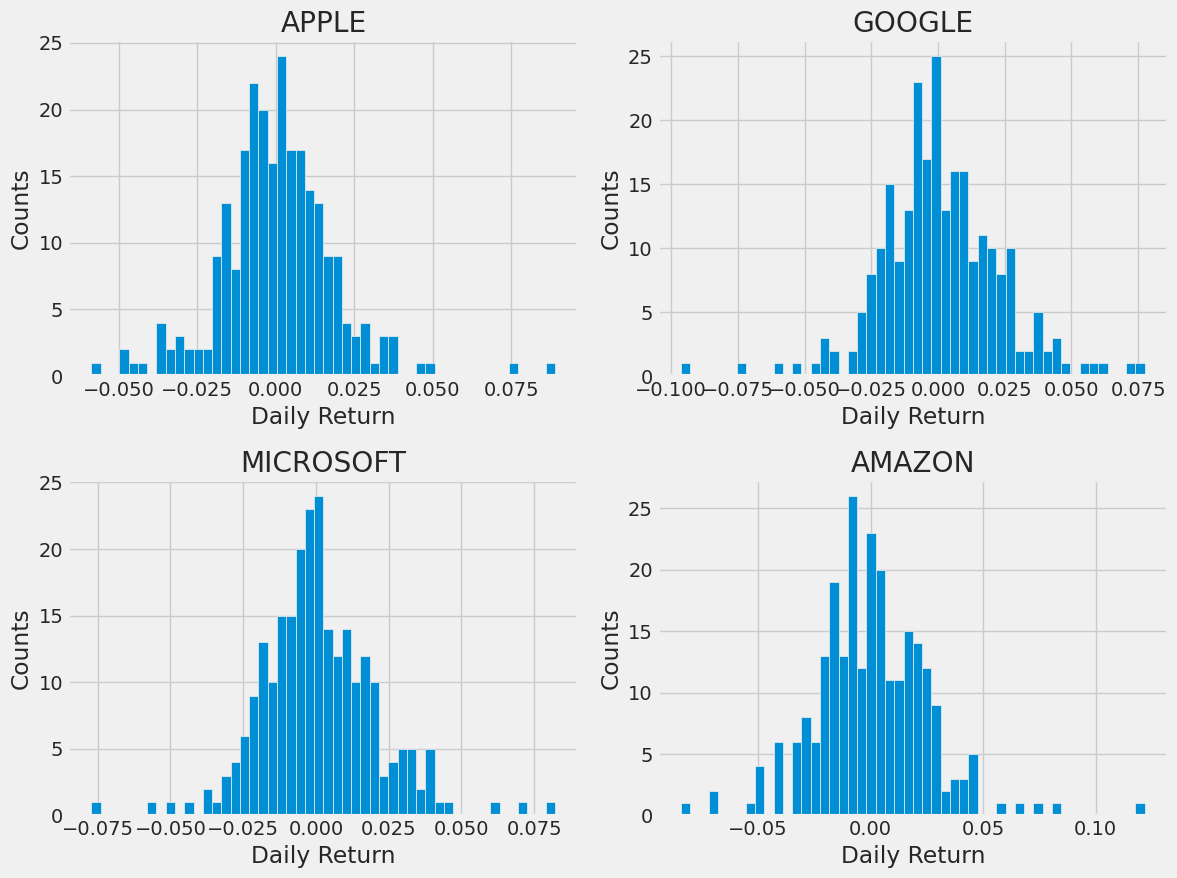

In [32]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [34]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466094,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533088,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784390,394024400
...,...,...,...,...,...,...
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


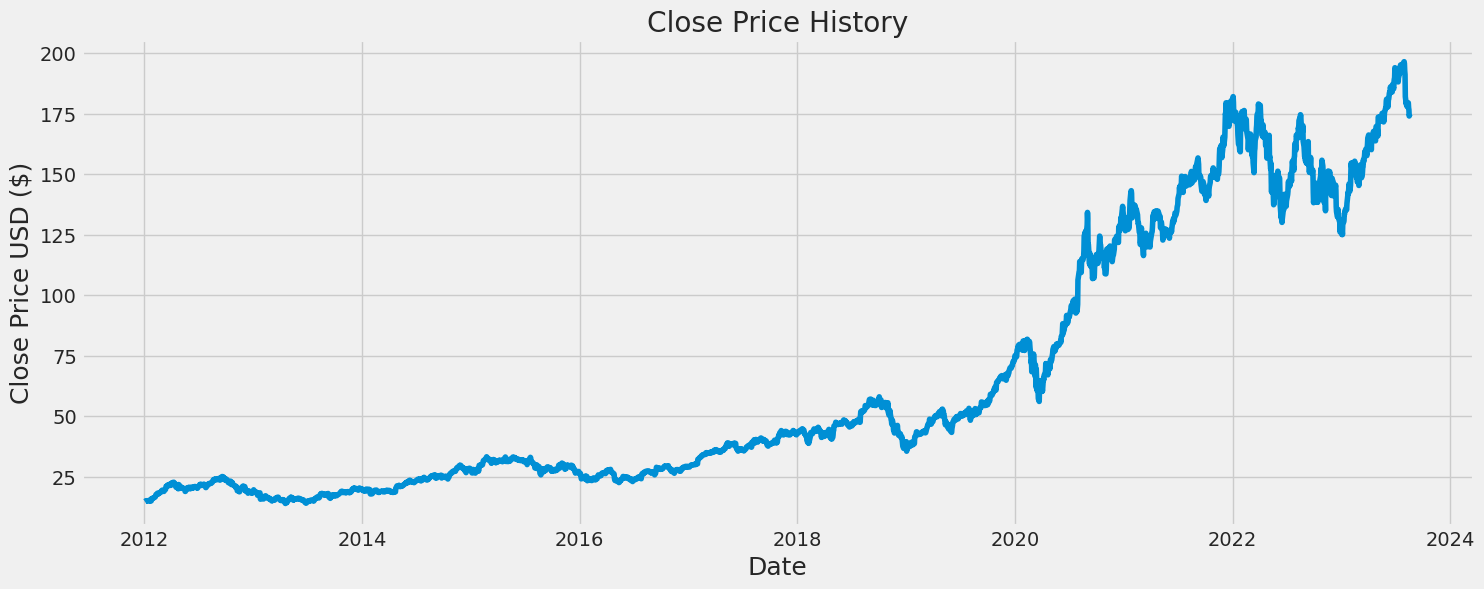

In [35]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [36]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2781

In [37]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.876988  ],
       [0.87967293],
       [0.88224824]])

In [38]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2721/2721 [==============================] - 117s 41ms/step - loss: 0.0013


In [40]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 34ms/step


6.17983699730771

<ipython-input-41-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


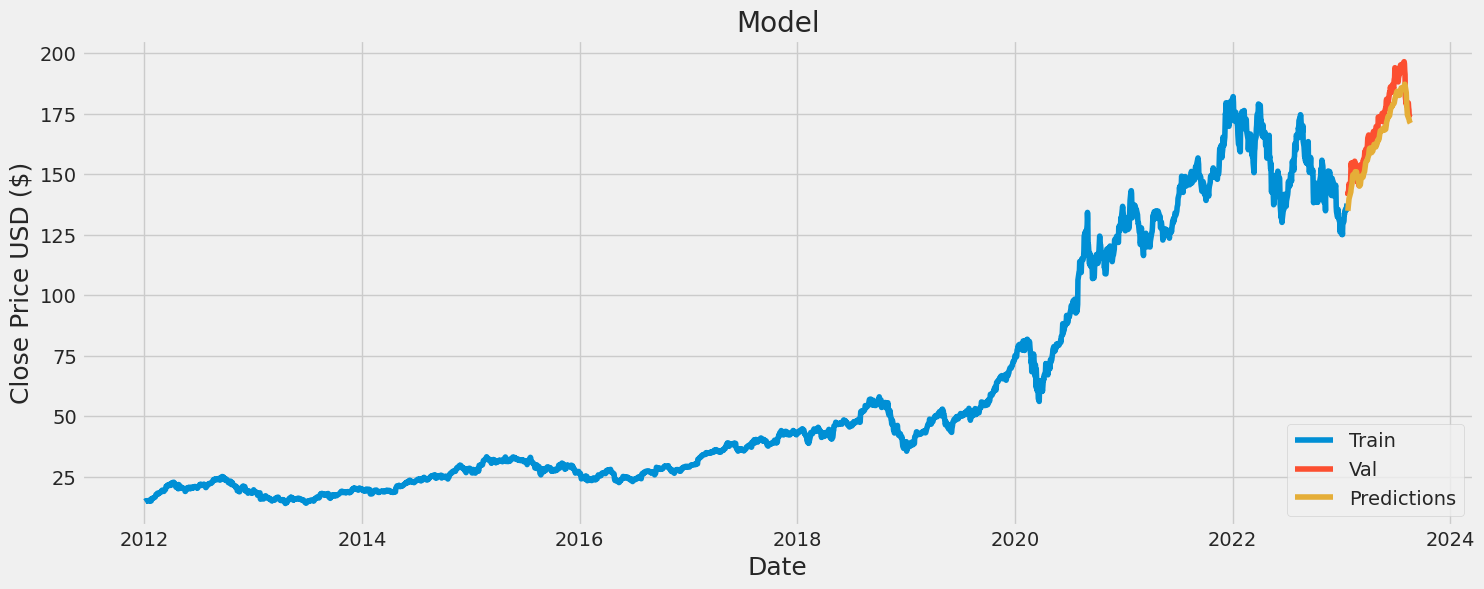

In [41]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-01-23,141.110001,134.835297
2023-01-24,142.529999,136.064697
2023-01-25,141.860001,137.523071
2023-01-26,143.960007,138.686249
2023-01-27,145.929993,139.881119
...,...,...
2023-08-15,177.449997,173.155487
2023-08-16,176.570007,172.858139
2023-08-17,174.000000,172.489120
